In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
artists_df = pickle.load( open( r"C:\Users\abels\Desktop\spotify_scrape\Data_Wrangling\final_csv_files\artists_master.p", "rb" ) )
song_df = pickle.load( open( r"C:\Users\abels\Desktop\spotify_scrape\Data_Wrangling\final_csv_files\song_dataframe_master.p", "rb" ) )
song_feature_df = pickle.load( open( r"C:\Users\abels\Desktop\spotify_scrape\Data_Wrangling\final_csv_files\song_feature_masterdf.p", "rb" ) )

In [4]:
artists_df.head()

,Artist,api_url,artist_api_id,genres
0,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,2mpeljBig2IXLXRAFO9AAs,"[dance pop, new wave pop, pop, pop rock]"
1,James TW,https://open.spotify.com/artist/0B3N0ZINFWvizf...,0B3N0ZINFWvizfa8bKiz4v,"[australian pop, dance pop, indie cafe pop, ne..."
2,Justin Stone,https://open.spotify.com/artist/5Vu87j6vCvfwc7...,5Vu87j6vCvfwc7FNVGnBwk,"[deep underground hip hop, indie pop rap]"
3,Natasha Bedingfield,https://open.spotify.com/artist/7o95ZoZt5ZYn31...,7o95ZoZt5ZYn31e9z1Hc0a,"[dance pop, europop, folk-pop, neo mellow, pop..."
4,GAMMAL,https://open.spotify.com/artist/3O6DpqAKwn7L1K...,3O6DpqAKwn7L1KS9s9x0w5,"[indie cafe pop, swedish pop]"


In [5]:
artists_df.shape

(4665, 4)

In [6]:
song_df = pd.DataFrame.from_dict(song_df, orient='index')

In [7]:
song_df.head()

,artist_id,name,explicit,popularity,track_id,Artist_name
751gBcu62kORDelX7FV0mM,2mpeljBig2IXLXRAFO9AAs,Thank You,False,58,751gBcu62kORDelX7FV0mM,Dido
3adnLFXKO5rC1lhUNSeg3N,2mpeljBig2IXLXRAFO9AAs,White Flag,False,52,3adnLFXKO5rC1lhUNSeg3N,Dido
5kj1AhJxSUums4ddBEaMhT,2mpeljBig2IXLXRAFO9AAs,Here With Me,False,50,5kj1AhJxSUums4ddBEaMhT,Dido
2Y1nYcVwVnPOn1FHZ0dc5L,2mpeljBig2IXLXRAFO9AAs,Take You Home,False,57,2Y1nYcVwVnPOn1FHZ0dc5L,Dido
1ujIGAJ2sp9ZXJVnZJxbQa,2mpeljBig2IXLXRAFO9AAs,Hurricanes,False,55,1ujIGAJ2sp9ZXJVnZJxbQa,Dido


In [8]:
song_df = song_df.reset_index()

In [9]:
song_df.columns.values[0] = 'track_id2'

In [10]:
song_df.head()

,track_id2,artist_id,name,explicit,popularity,track_id,Artist_name
0,751gBcu62kORDelX7FV0mM,2mpeljBig2IXLXRAFO9AAs,Thank You,False,58,751gBcu62kORDelX7FV0mM,Dido
1,3adnLFXKO5rC1lhUNSeg3N,2mpeljBig2IXLXRAFO9AAs,White Flag,False,52,3adnLFXKO5rC1lhUNSeg3N,Dido
2,5kj1AhJxSUums4ddBEaMhT,2mpeljBig2IXLXRAFO9AAs,Here With Me,False,50,5kj1AhJxSUums4ddBEaMhT,Dido
3,2Y1nYcVwVnPOn1FHZ0dc5L,2mpeljBig2IXLXRAFO9AAs,Take You Home,False,57,2Y1nYcVwVnPOn1FHZ0dc5L,Dido
4,1ujIGAJ2sp9ZXJVnZJxbQa,2mpeljBig2IXLXRAFO9AAs,Hurricanes,False,55,1ujIGAJ2sp9ZXJVnZJxbQa,Dido


In [11]:
song_feature_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,000TiSS4vK5su0MkoFyQbd,0.717,0.646,6,-7.692,0,0.1070,0.237,0.000000,0.1270,0.0966,80.022,audio_features,000TiSS4vK5su0MkoFyQbd,spotify:track:000TiSS4vK5su0MkoFyQbd,https://api.spotify.com/v1/tracks/000TiSS4vK5s...,https://api.spotify.com/v1/audio-analysis/000T...,159250,4
1,000xYdQfIZ4pDmBGzQalKU,0.509,0.803,0,-6.743,1,0.0400,0.684,0.000539,0.4630,0.6510,166.018,audio_features,000xYdQfIZ4pDmBGzQalKU,spotify:track:000xYdQfIZ4pDmBGzQalKU,https://api.spotify.com/v1/tracks/000xYdQfIZ4p...,https://api.spotify.com/v1/audio-analysis/000x...,187119,4
2,002DUjoJzO3NqA4w3mTA2i,0.783,0.880,2,-4.927,1,0.2370,0.256,0.000000,0.1050,0.5400,113.932,audio_features,002DUjoJzO3NqA4w3mTA2i,spotify:track:002DUjoJzO3NqA4w3mTA2i,https://api.spotify.com/v1/tracks/002DUjoJzO3N...,https://api.spotify.com/v1/audio-analysis/002D...,251267,4
3,002r1ZwqA9IL2pWtJMOs9f,0.668,0.778,10,-4.912,0,0.0991,0.352,0.000000,0.5610,0.5310,126.919,audio_features,002r1ZwqA9IL2pWtJMOs9f,spotify:track:002r1ZwqA9IL2pWtJMOs9f,https://api.spotify.com/v1/tracks/002r1ZwqA9IL...,https://api.spotify.com/v1/audio-analysis/002r...,235751,4
4,003F0rm5lqxcmhvJPKgfaJ,0.683,0.676,1,-6.688,0,0.1470,0.159,0.000000,0.0726,0.4340,98.992,audio_features,003F0rm5lqxcmhvJPKgfaJ,spotify:track:003F0rm5lqxcmhvJPKgfaJ,https://api.spotify.com/v1/tracks/003F0rm5lqxc...,https://api.spotify.com/v1/audio-analysis/003F...,180933,4


In [12]:
song_feature_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,4.413500e+04,44135.000000
mean,0.632571,0.649914,5.306967,-7.263420,0.611737,0.103013,0.257879,0.050597,0.189085,0.518110,120.371369,2.180257e+05,3.957245
std,0.155702,0.205306,3.598138,3.511253,0.487361,0.104982,0.277702,0.175376,0.157644,0.238962,28.188996,6.175961e+04,0.309599
min,0.000000,0.000279,0.000000,-38.723000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,5.547000e+03,0.000000
25%,0.533000,0.522000,2.000000,-8.783000,0.000000,0.037100,0.032200,0.000000,0.094300,0.331000,98.002000,1.832215e+05,4.000000
50%,0.646000,0.679000,6.000000,-6.499000,1.000000,0.055300,0.146000,0.000003,0.125000,0.517000,120.010000,2.100350e+05,4.000000
75%,0.746000,0.810000,8.000000,-4.926000,1.000000,0.122000,0.409000,0.000631,0.235000,0.707000,137.957500,2.419645e+05,4.000000
max,0.990000,0.999000,11.000000,1.498000,1.000000,0.963000,0.995000,0.999000,0.997000,0.992000,244.613000,3.720547e+06,5.000000


In [13]:
genres_list = artists_df['genres']
genres_list.head()

0             [dance pop, new wave pop, pop, pop rock]
1    [australian pop, dance pop, indie cafe pop, ne...
2            [deep underground hip hop, indie pop rap]
3    [dance pop, europop, folk-pop, neo mellow, pop...
4                        [indie cafe pop, swedish pop]
Name: genres, dtype: object

In [14]:
unique_genres = list(set(list(chain(*genres_list))))

In [15]:
len(unique_genres)
genre_count = defaultdict(int)

In [16]:
for x in artists_df['genres']:
    for y in x:
        genre_count[y] += 1

genre_count = Counter(genre_count)

In [17]:
genre_count.most_common(10)

[('pop', 599),
 ('dance pop', 463),
 ('pop rap', 322),
 ('rock', 319),
 ('rap', 314),
 ('tropical house', 264),
 ('hip hop', 258),
 ('modern rock', 257),
 ('post-teen pop', 253),
 ('edm', 241)]

In [18]:
len(genre_count)

1023

In [19]:
common_genres = genre_count.most_common(10)

In [20]:
common_genres

[('pop', 599),
 ('dance pop', 463),
 ('pop rap', 322),
 ('rock', 319),
 ('rap', 314),
 ('tropical house', 264),
 ('hip hop', 258),
 ('modern rock', 257),
 ('post-teen pop', 253),
 ('edm', 241)]

In [21]:
common_genres = dict((y,x) for y,x in common_genres)

In [22]:
genre_count.most_common(100)

[('pop', 599),
 ('dance pop', 463),
 ('pop rap', 322),
 ('rock', 319),
 ('rap', 314),
 ('tropical house', 264),
 ('hip hop', 258),
 ('modern rock', 257),
 ('post-teen pop', 253),
 ('edm', 241),
 ('r&b', 231),
 ('trap music', 218),
 ('electropop', 214),
 ('latin', 214),
 ('southern hip hop', 210),
 ('mellow gold', 193),
 ('adult standards', 191),
 ('soft rock', 184),
 ('indie poptimism', 175),
 ('pop rock', 172),
 ('electro house', 169),
 ('underground hip hop', 162),
 ('indietronica', 161),
 ('tropical', 156),
 ('indie rock', 151),
 ('folk-pop', 150),
 ('indie pop', 139),
 ('europop', 136),
 ('classic rock', 136),
 ('album rock', 135),
 ('urban contemporary', 135),
 ('neo mellow', 131),
 ('brill building pop', 127),
 ('pop edm', 126),
 ('new wave pop', 125),
 ('latin pop', 124),
 ('folk rock', 120),
 ('indie folk', 119),
 ('lounge', 114),
 ('indie r&b', 112),
 ('new rave', 110),
 ('gangster rap', 108),
 ('big room', 107),
 ('post-grunge', 106),
 ('funk carioca', 105),
 ('dance rock', 1

In [23]:
common_genres

{'pop': 599,
 'dance pop': 463,
 'pop rap': 322,
 'rock': 319,
 'rap': 314,
 'tropical house': 264,
 'hip hop': 258,
 'modern rock': 257,
 'post-teen pop': 253,
 'edm': 241}

In [24]:
master_df = song_df.merge(artists_df, how='outer', left_on='artist_id', right_on='artist_api_id')

In [25]:
master_df = master_df.merge(song_feature_df, how='inner', left_on='track_id', right_on='track_id', suffixes=('track_id', 'track_id2'))

In [26]:
master_df.columns

Index(['track_id2', 'artist_id', 'name', 'explicit', 'popularity', 'track_id',
       'Artist_name', 'Artist', 'api_url', 'artist_api_id', 'genres',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [27]:
master_df = master_df.drop(columns=['track_id2', 'Artist_name', 'artist_id', 'artist_api_id', 'type', 'id', 'uri', 'track_href', 'analysis_url'])
master_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Thank You,False,58.0,751gBcu62kORDelX7FV0mM,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.722,0.595,1,-9.928,0,0.0415,0.28400,0.000538,0.0694,0.7380,79.980,217827,4
1,White Flag,False,52.0,3adnLFXKO5rC1lhUNSeg3N,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.509,0.538,5,-6.835,1,0.0379,0.30600,0.000005,0.0910,0.2840,170.111,240600,4
2,Here With Me,False,50.0,5kj1AhJxSUums4ddBEaMhT,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.550,0.578,11,-7.973,0,0.0273,0.08760,0.000008,0.0757,0.3640,83.346,255427,4
3,Take You Home,False,57.0,2Y1nYcVwVnPOn1FHZ0dc5L,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.706,0.789,7,-7.767,1,0.0415,0.00487,0.144000,0.1500,0.5270,110.012,305960,4
4,Hurricanes,False,55.0,1ujIGAJ2sp9ZXJVnZJxbQa,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.535,0.459,6,-8.490,0,0.0645,0.07220,0.117000,0.0942,0.0969,175.944,317293,4


In [28]:
master_df['pop'] = 0
master_df['dance pop'] = 0
master_df['pop rap'] = 0
master_df['rock'] = 0
master_df['tropical house'] = 0
master_df['hip hop'] = 0
master_df['modern rock'] = 0
master_df['post-teen pop'] = 0
master_df['edm'] = 0
master_df['rap'] = 0

In [29]:
master_df['pop'] = master_df['pop'].astype(int)
master_df['dance pop'] = master_df['dance pop'].astype(int)
master_df['pop rap'] = master_df['pop rap'].astype(int)
master_df['rock'] = master_df['rock'].astype(int)
master_df['tropical house'] = master_df['tropical house'].astype(int)
master_df['hip hop'] = master_df['hip hop'].astype(int)
master_df['modern rock'] = master_df['modern rock'].astype(int)
master_df['post-teen pop'] = master_df['post-teen pop'].astype(int)
master_df['edm'] = master_df['edm'].astype(int)
master_df['rap'] = master_df['rap'].astype(int)

In [30]:
for i, j in master_df['genres'].iteritems(): 
    for x in common_genres.keys():
        if x in j:
            master_df.at[i,x] = 1

In [31]:
mask = master_df['pop'] + master_df['dance pop'] + master_df['pop rap'] + master_df['rock'] + master_df['tropical house'] + master_df['hip hop'] + master_df['modern rock'] + master_df['post-teen pop'] + master_df['edm']

In [32]:
formated_df = master_df
formated_df['target_genre'] = mask
formated_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,dance pop,pop rap,rock,tropical house,hip hop,modern rock,post-teen pop,edm,rap,target_genre
0,Thank You,False,58.0,751gBcu62kORDelX7FV0mM,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.722,0.595,1,...,1,0,0,0,0,0,0,0,0,2
1,White Flag,False,52.0,3adnLFXKO5rC1lhUNSeg3N,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.509,0.538,5,...,1,0,0,0,0,0,0,0,0,2
2,Here With Me,False,50.0,5kj1AhJxSUums4ddBEaMhT,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.550,0.578,11,...,1,0,0,0,0,0,0,0,0,2
3,Take You Home,False,57.0,2Y1nYcVwVnPOn1FHZ0dc5L,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.706,0.789,7,...,1,0,0,0,0,0,0,0,0,2
4,Hurricanes,False,55.0,1ujIGAJ2sp9ZXJVnZJxbQa,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.535,0.459,6,...,1,0,0,0,0,0,0,0,0,2


In [33]:
formated_df = formated_df[formated_df.target_genre > 0]

In [34]:
formated_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,dance pop,pop rap,rock,tropical house,hip hop,modern rock,post-teen pop,edm,rap,target_genre
0,Thank You,False,58.0,751gBcu62kORDelX7FV0mM,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.722,0.595,1,...,1,0,0,0,0,0,0,0,0,2
1,White Flag,False,52.0,3adnLFXKO5rC1lhUNSeg3N,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.509,0.538,5,...,1,0,0,0,0,0,0,0,0,2
2,Here With Me,False,50.0,5kj1AhJxSUums4ddBEaMhT,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.550,0.578,11,...,1,0,0,0,0,0,0,0,0,2
3,Take You Home,False,57.0,2Y1nYcVwVnPOn1FHZ0dc5L,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.706,0.789,7,...,1,0,0,0,0,0,0,0,0,2
4,Hurricanes,False,55.0,1ujIGAJ2sp9ZXJVnZJxbQa,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.535,0.459,6,...,1,0,0,0,0,0,0,0,0,2


In [35]:
formated_df.columns

Index(['name', 'explicit', 'popularity', 'track_id', 'Artist', 'api_url',
       'genres', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'pop', 'dance pop',
       'pop rap', 'rock', 'tropical house', 'hip hop', 'modern rock',
       'post-teen pop', 'edm', 'rap', 'target_genre'],
      dtype='object')

In [36]:
final_formatted_df = pd.melt(formated_df, id_vars=['name', 'explicit', 'popularity', 'track_id', 'Artist', 'api_url',
       'genres', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'], value_vars=['pop', 'dance pop',
       'pop rap', 'rock', 'tropical house', 'hip hop', 'modern rock',
       'post-teen pop', 'edm', 'rap'], var_name='genre')

In [37]:
final_formatted_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,value
0,Thank You,False,58.0,751gBcu62kORDelX7FV0mM,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.722,0.595,1,...,0.0415,0.28400,0.000538,0.0694,0.7380,79.980,217827,4,pop,1
1,White Flag,False,52.0,3adnLFXKO5rC1lhUNSeg3N,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.509,0.538,5,...,0.0379,0.30600,0.000005,0.0910,0.2840,170.111,240600,4,pop,1
2,Here With Me,False,50.0,5kj1AhJxSUums4ddBEaMhT,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.550,0.578,11,...,0.0273,0.08760,0.000008,0.0757,0.3640,83.346,255427,4,pop,1
3,Take You Home,False,57.0,2Y1nYcVwVnPOn1FHZ0dc5L,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.706,0.789,7,...,0.0415,0.00487,0.144000,0.1500,0.5270,110.012,305960,4,pop,1
4,Hurricanes,False,55.0,1ujIGAJ2sp9ZXJVnZJxbQa,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.535,0.459,6,...,0.0645,0.07220,0.117000,0.0942,0.0969,175.944,317293,4,pop,1


In [38]:
final_formatted_df = final_formatted_df[final_formatted_df.value > 0]

In [39]:
final_formatted_df.shape

(30479, 22)

In [40]:
sns.set_style("dark")
plt.rcParams["axes.labelsize"] = 15

In [41]:
def pctile(data, prt=[5,95]):
    adj_data = data[(data > np.percentile(data,prt)[0]) & (data < np.percentile(data,prt)[1])]
    return adj_data

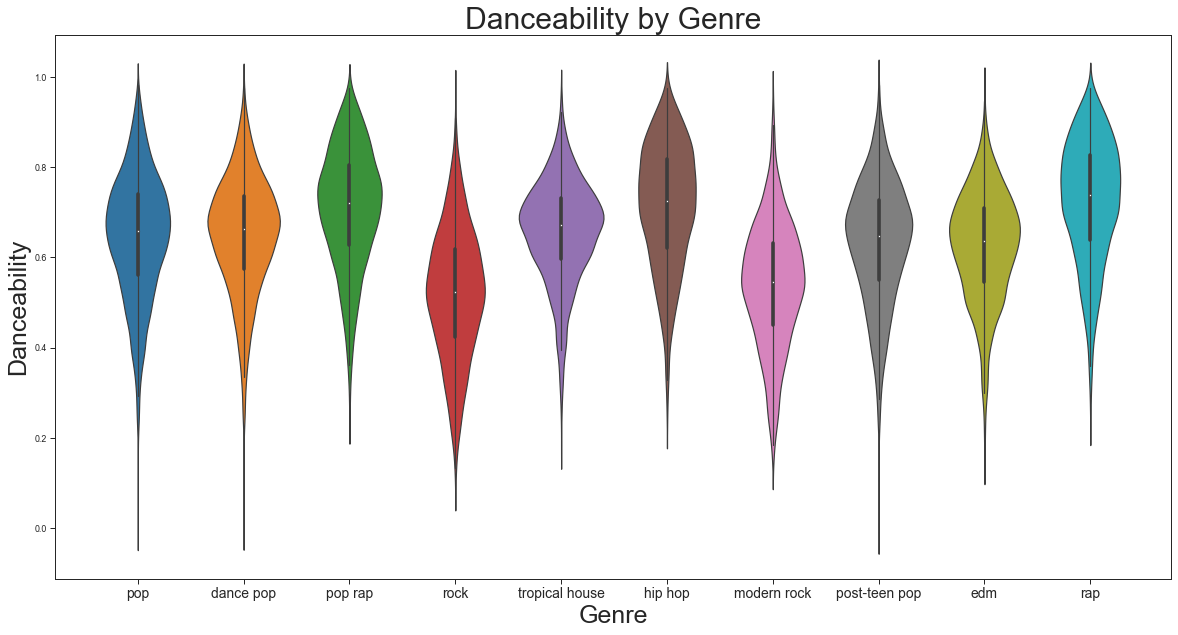

In [42]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.danceability)
_.axes.set_title("Danceability by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=25)
_.set_ylabel("Danceability",fontsize=25)
plt.xticks(fontsize=14)
plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\danceability.png')

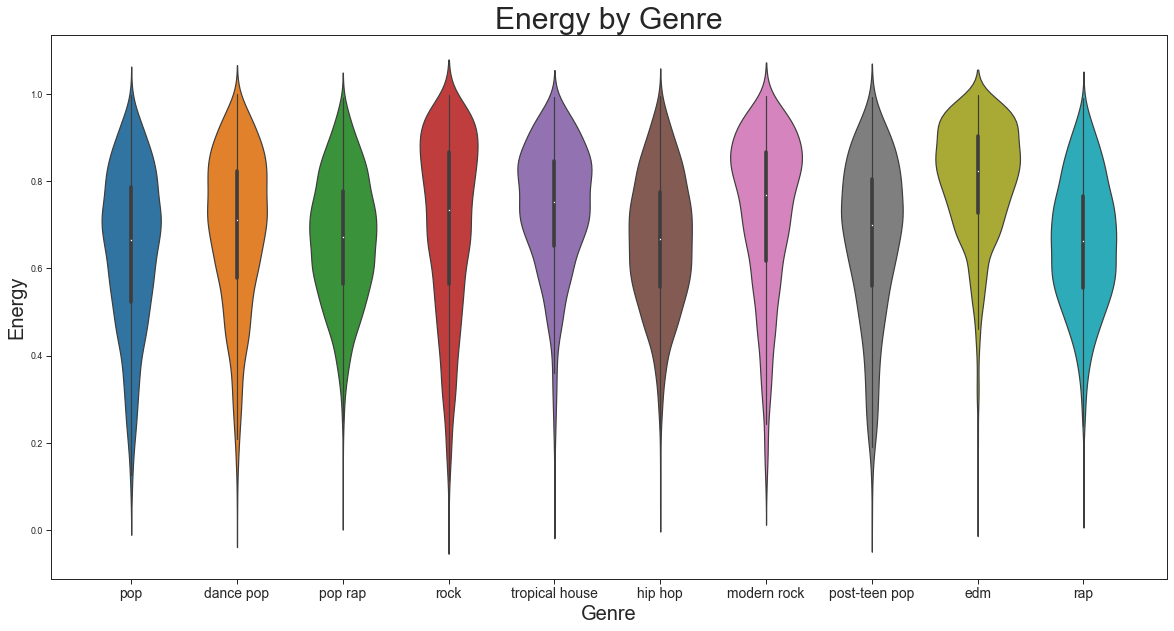

In [43]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.energy)
_.axes.set_title("Energy by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("Energy",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\energy.png')

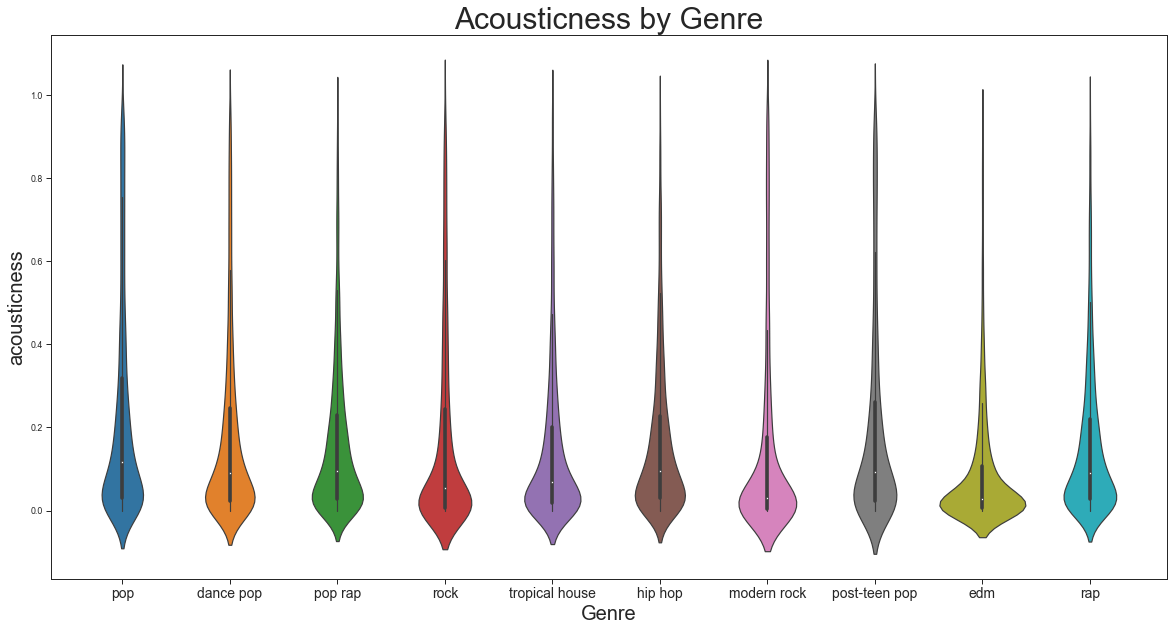

In [44]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 


_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.acousticness)
_.axes.set_title("Acousticness by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("acousticness",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\acousticness.png')

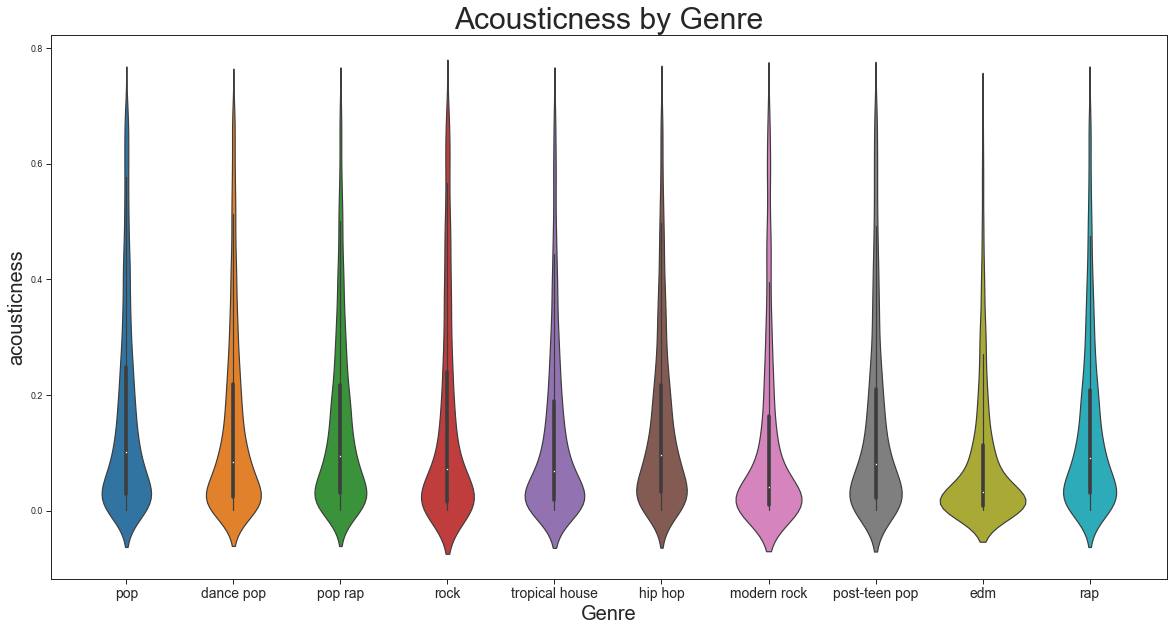

In [45]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 


_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.acousticness))
_.axes.set_title("Acousticness by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("acousticness",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

#plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\danceability.png')

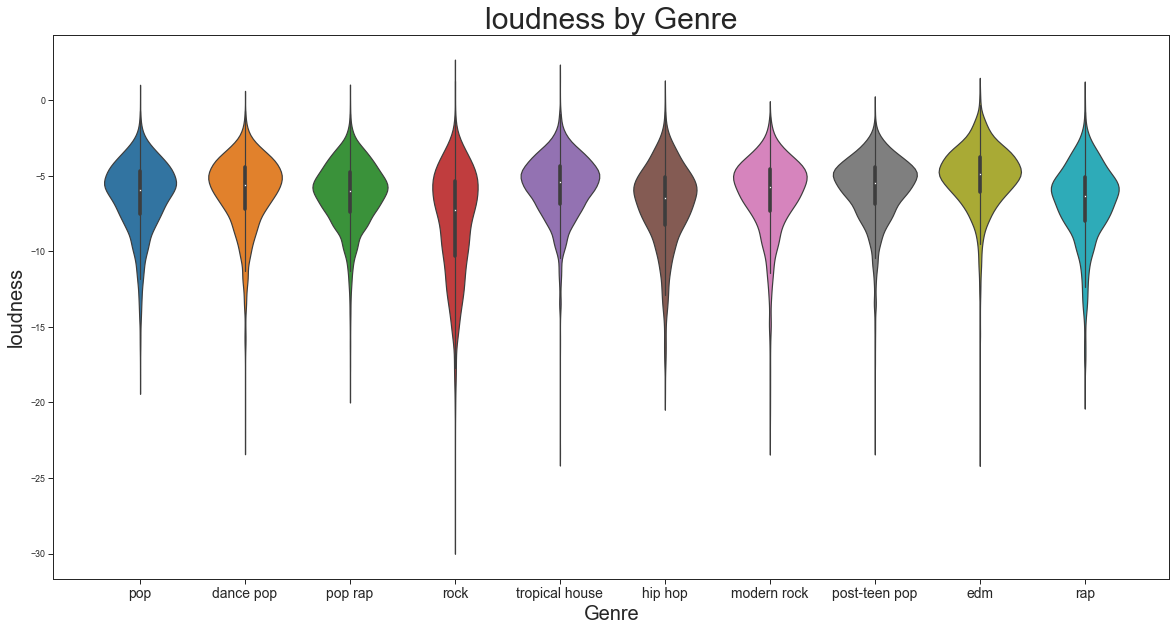

In [46]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.loudness)
_.axes.set_title("loudness by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("loudness",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\loudness.png')

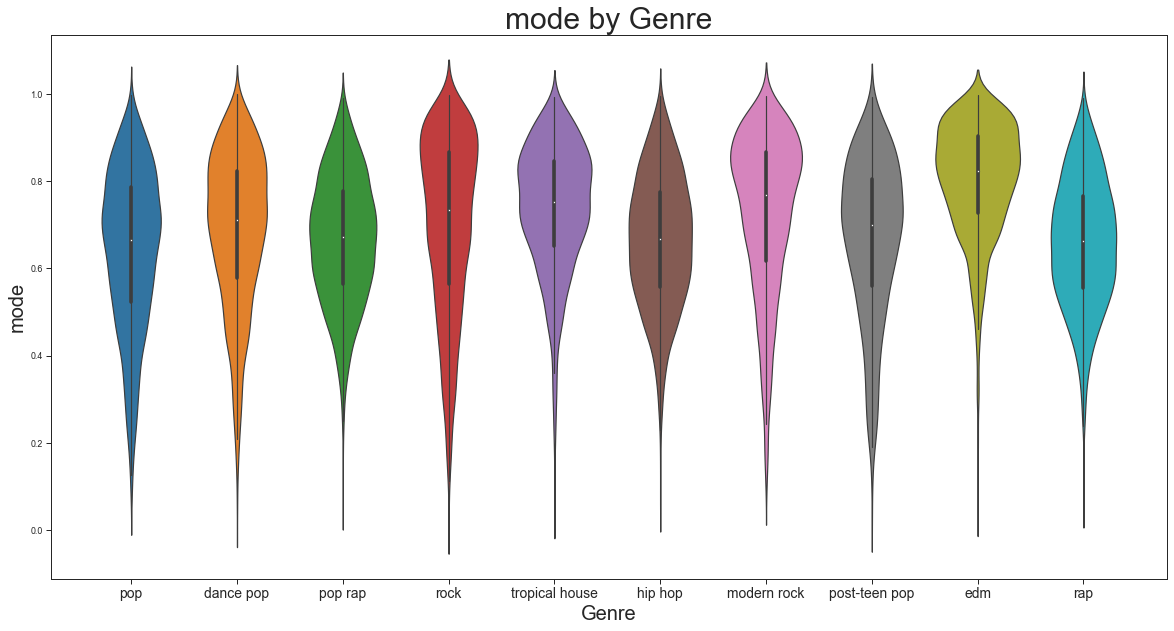

In [47]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.energy)
_.axes.set_title("mode by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("mode",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\mode.png')

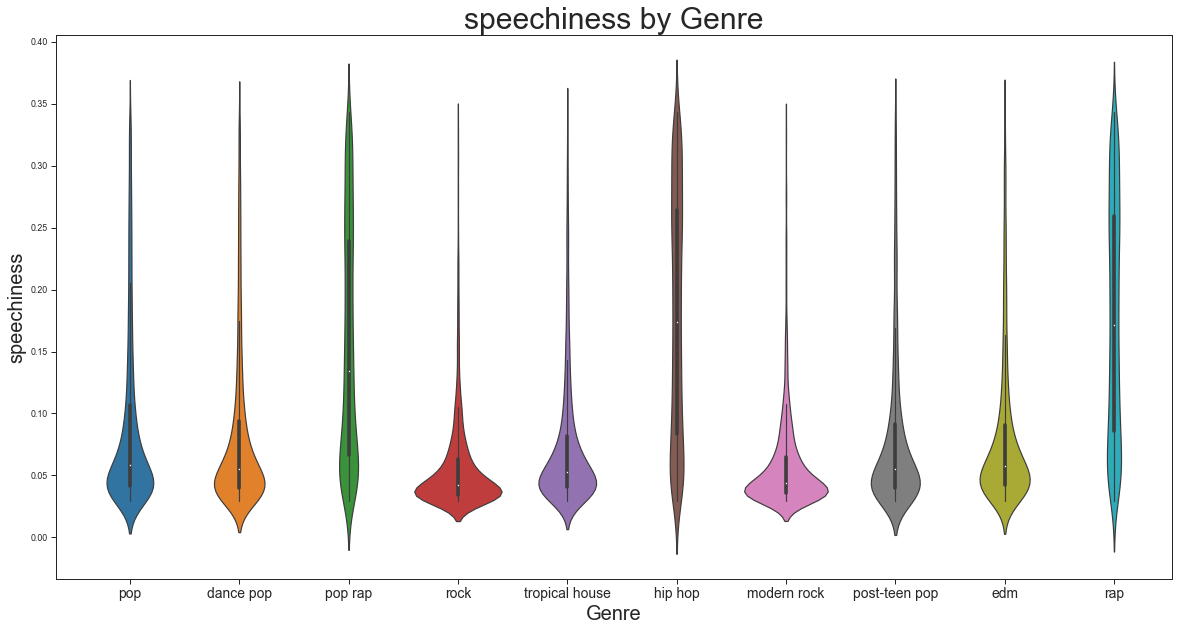

In [48]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 


_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.speechiness))
_.axes.set_title("speechiness by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("speechiness",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\speechiness.png')

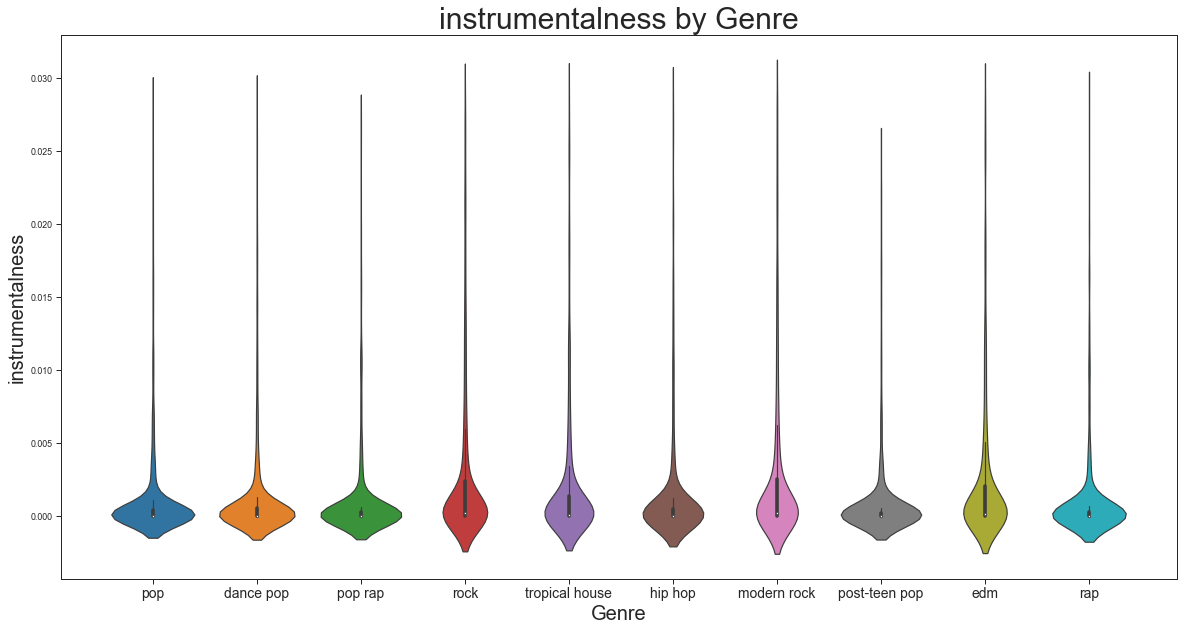

In [49]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.instrumentalness, [10,90]))
_.axes.set_title("instrumentalness by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("instrumentalness",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\instrumentalness.png')

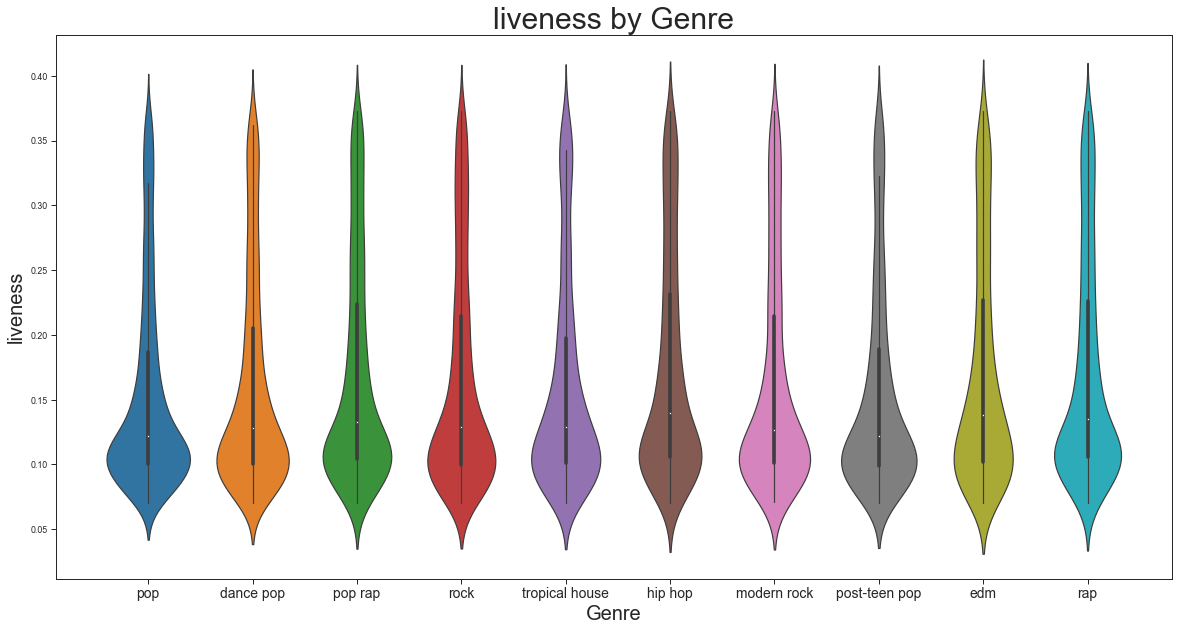

In [50]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.liveness, [10,90]))
_.axes.set_title("liveness by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("liveness",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\liveness.png')

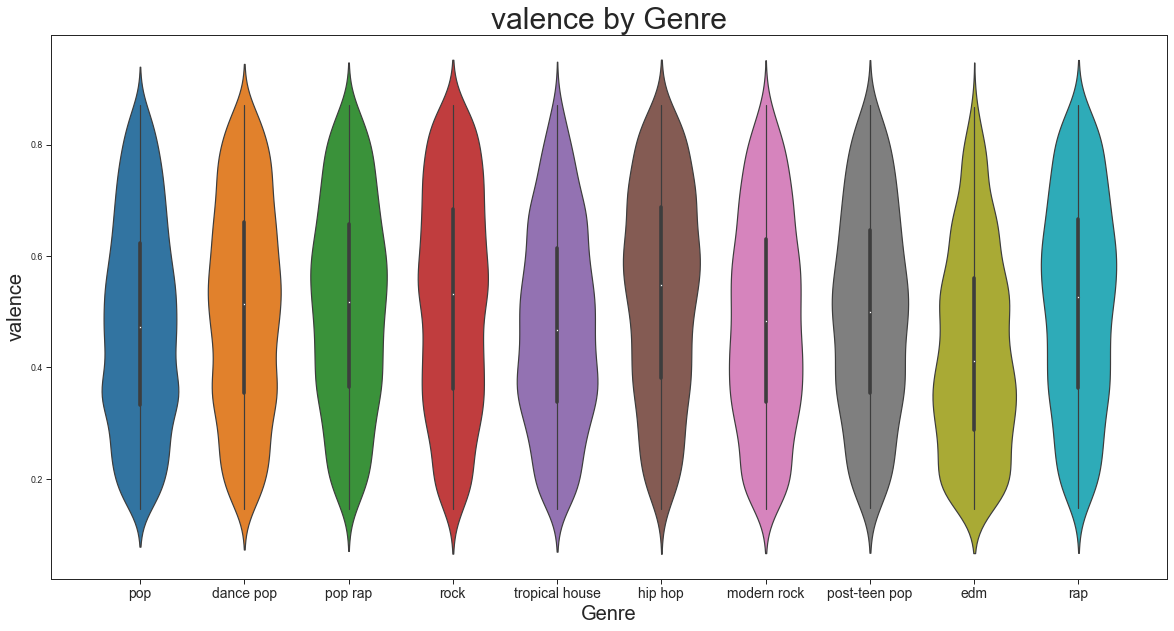

In [51]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.valence))
_.axes.set_title("valence by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("valence",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\valence.png')

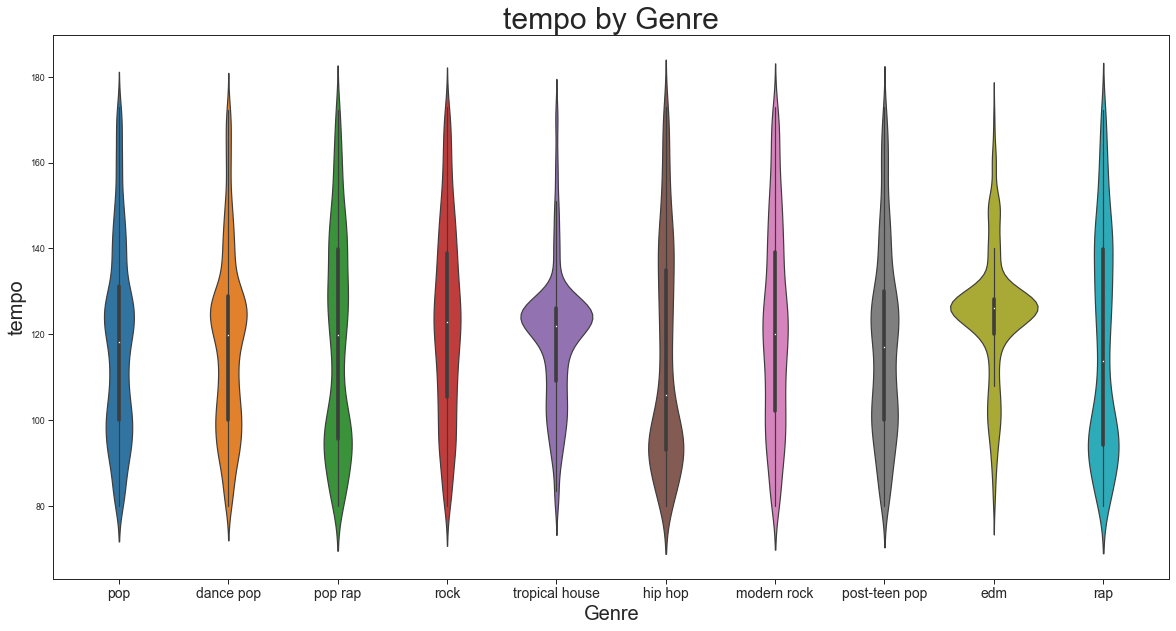

In [52]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.tempo))
_.axes.set_title("tempo by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("tempo",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\tempo.png')

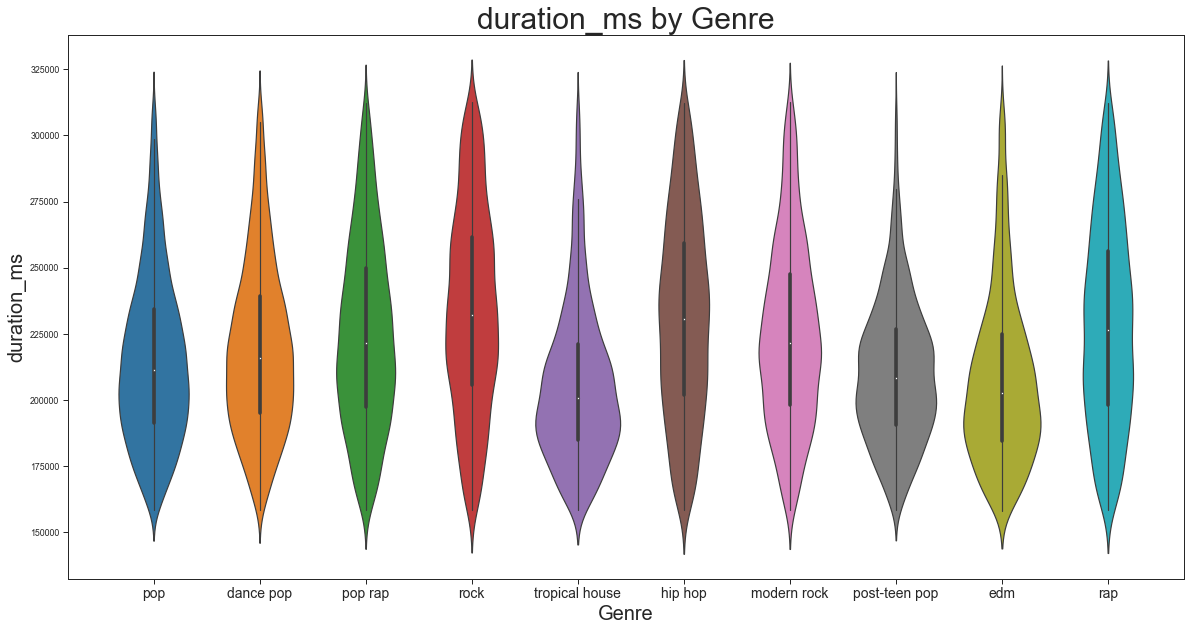

In [53]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.duration_ms))
_.axes.set_title("duration_ms by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("duration_ms",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\duration_ms.png')

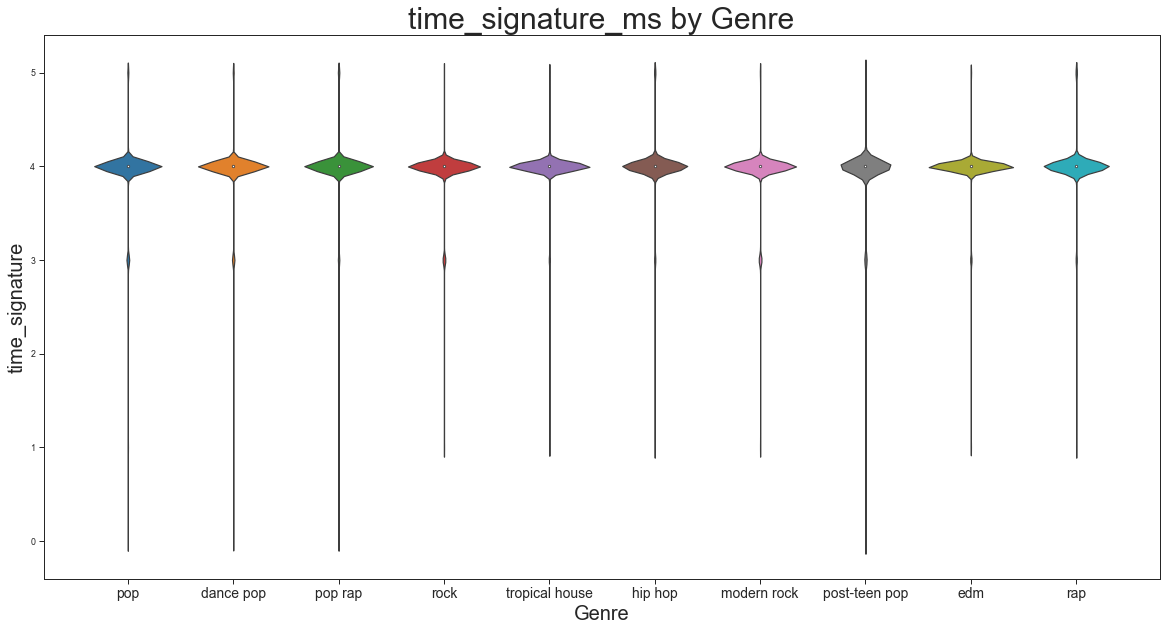

In [54]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 


_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.time_signature)
_.axes.set_title("time_signature_ms by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("time_signature",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\time_signature.png')

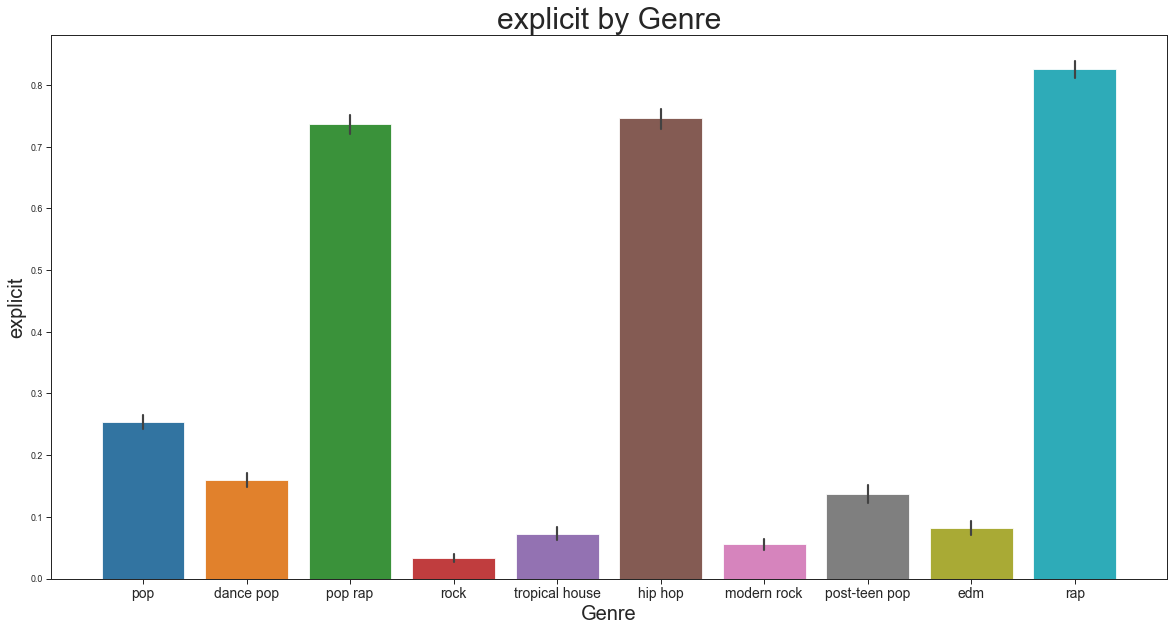

In [55]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 

_ = plt.figure(figsize=(20,10))

_ = sns.barplot(final_formatted_df.genre, final_formatted_df.explicit)
_.axes.set_title("explicit by Genre",fontsize=30)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("explicit",fontsize=20)
plt.xticks(fontsize=14)
_ = plt.plot()

plt.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\explicit.png')

'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature',

In [56]:
genre_count = final_formatted_df.genre.value_counts().nlargest(10)

In [57]:
type(genre_count)

pandas.core.series.Series

In [58]:
genre_count.keys()

Index(['pop', 'dance pop', 'rock', 'pop rap', 'rap', 'modern rock', 'hip hop',
       'tropical house', 'post-teen pop', 'edm'],
      dtype='object')

In [59]:
genre_count.values

array([5505, 4331, 3175, 3030, 2572, 2538, 2456, 2361, 2356, 2155],
      dtype=int64)

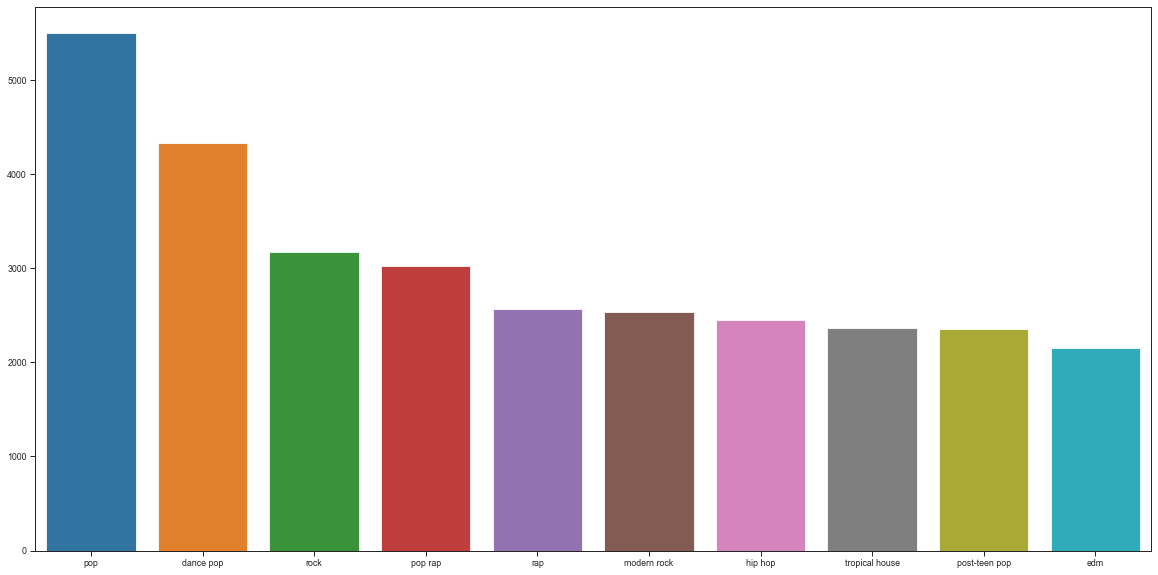

In [60]:
_ = plt.figure(figsize=(20,10))
_ = sns.barplot(genre_count.keys(), genre_count.values)

In [61]:
final_formatted_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,value
0,Thank You,False,58.0,751gBcu62kORDelX7FV0mM,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.722,0.595,1,...,0.0415,0.28400,0.000538,0.0694,0.7380,79.980,217827,4,pop,1
1,White Flag,False,52.0,3adnLFXKO5rC1lhUNSeg3N,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.509,0.538,5,...,0.0379,0.30600,0.000005,0.0910,0.2840,170.111,240600,4,pop,1
2,Here With Me,False,50.0,5kj1AhJxSUums4ddBEaMhT,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.550,0.578,11,...,0.0273,0.08760,0.000008,0.0757,0.3640,83.346,255427,4,pop,1
3,Take You Home,False,57.0,2Y1nYcVwVnPOn1FHZ0dc5L,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.706,0.789,7,...,0.0415,0.00487,0.144000,0.1500,0.5270,110.012,305960,4,pop,1
4,Hurricanes,False,55.0,1ujIGAJ2sp9ZXJVnZJxbQa,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.535,0.459,6,...,0.0645,0.07220,0.117000,0.0942,0.0969,175.944,317293,4,pop,1


In [62]:
formated_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,dance pop,pop rap,rock,tropical house,hip hop,modern rock,post-teen pop,edm,rap,target_genre
0,Thank You,False,58.0,751gBcu62kORDelX7FV0mM,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.722,0.595,1,...,1,0,0,0,0,0,0,0,0,2
1,White Flag,False,52.0,3adnLFXKO5rC1lhUNSeg3N,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.509,0.538,5,...,1,0,0,0,0,0,0,0,0,2
2,Here With Me,False,50.0,5kj1AhJxSUums4ddBEaMhT,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.550,0.578,11,...,1,0,0,0,0,0,0,0,0,2
3,Take You Home,False,57.0,2Y1nYcVwVnPOn1FHZ0dc5L,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.706,0.789,7,...,1,0,0,0,0,0,0,0,0,2
4,Hurricanes,False,55.0,1ujIGAJ2sp9ZXJVnZJxbQa,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,"[dance pop, new wave pop, pop, pop rock]",0.535,0.459,6,...,1,0,0,0,0,0,0,0,0,2


In [63]:
formated_df = formated_df.rename(columns={'post-teen pop': 'post_teen_pop'})

In [64]:
formated_df.columns

Index(['name', 'explicit', 'popularity', 'track_id', 'Artist', 'api_url',
       'genres', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'pop', 'dance pop',
       'pop rap', 'rock', 'tropical house', 'hip hop', 'modern rock',
       'post_teen_pop', 'edm', 'rap', 'target_genre'],
      dtype='object')

In [65]:
formated_df = formated_df.rename(columns={"dance pop": "dance_pop", "pop rap": "pop_rap", "tropical house": "tropical_house", "hip hop": "hip_hop", "modern rock":"modern_rock"})

In [66]:
X = formated_df[['pop', 'dance_pop','pop_rap', 'rock', 'tropical_house', 'hip_hop', 'modern_rock','post_teen_pop', 'edm', 'rap']]

In [67]:
from statsmodels.formula.api import ols

In [68]:
fit = ols('danceability ~ C(explicit) + pop + dance_pop + pop_rap + rock + tropical_house + hip_hop + modern_rock + post_teen_pop + edm + rap', data=formated_df).fit()

C:\Users\abels\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [69]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     399.8
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:17:59   Log-Likelihood:                 9800.6
No. Observations:               16242   AIC:                        -1.958e+04
Df Residuals:                   16230   BIC:                        -1.948e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6265      0.003    242.308      0.000       0.621       0.632
C(explicit)[T.True]     0.0362      0.003     10.710      0.000       0.030       0.043
pop                    -0.0043      0.003     -1.609      0.108      -0.010       0.001
dance_pop               0.0137      0.003      4.720      0.000       0.008       0.019
pop_rap                 0.0200      0.004      5.053      0.000       0.012       0.028
rock                   -0.0946      0.003    -29.258      0.000      -0.101      -0.088
tropical_house          0.0397      0.003     11.819      0.000       0.033       0.046
hip_hop                 0.0040      0.005      0.839      0.401      -0.005       0.013
modern_rock            -0.0606      0.003    -18.618      0.000      -0.067      -0.054
post_teen_pop          -0.0124      0.003     -3.549      0.000      -0.019      -0.006
edm                    -0.0275      0.004     -7.684      0.000      -0.035      -0.020
rap                     0.0480      0.006      8.680      0.000       0.037       0.059
==============================================================================
Omnibus:                      341.876   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.413
Skew:                          -0.366   Prob(JB):                     1.22e-79
Kurtosis:                       3.050   Cond. No.                         7.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
import statsmodels.api as sm

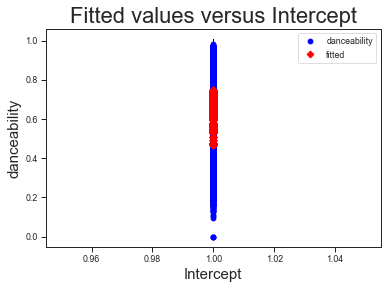

In [71]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit, 0, ax=ax)
plt.show()

In [72]:
dependent_variables = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

In [73]:
%%capture
#gather features
features = "+".join(df.columns - ["annual_inc"])

# get y and X dataframes based on this regression:
y, X = dmatrices('annual_inc ~' + features, df, return_type='dataframe')

NameError: name 'df' is not defined

In [74]:
pvalue_dict = {}
def create_ols(variable):
    fit = ols(variable + '~ C(explicit) + pop + dance_pop + pop_rap + rock + tropical_house + hip_hop + modern_rock + post_teen_pop + edm', data=formated_df).fit()
    print(fit.summary())
    pvalue_dict.update({variable:list(fit.pvalues)})

In [75]:
for values in dependent_variables:
    create_ols(values)

                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     430.2
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:18:01   Log-Likelihood:                 9763.0
No. Observations:               16242   AIC:                        -1.950e+04
Df Residuals:                   16231   BIC:                        -1.942e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6281    

                            OLS Regression Results                            
Dep. Variable:           acousticness   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          1.83e-226
Time:                        17:18:02   Log-Likelihood:                 1385.5
No. Observations:               16242   AIC:                            -2749.
Df Residuals:                   16231   BIC:                            -2664.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2349    

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     27.86
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           1.56e-53
Time:                        17:18:02   Log-Likelihood:                -76756.
No. Observations:               16242   AIC:                         1.535e+05
Df Residuals:                   16231   BIC:                         1.536e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             119.4744    

In [76]:
formated_df.columns

Index(['name', 'explicit', 'popularity', 'track_id', 'Artist', 'api_url',
       'genres', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'pop', 'dance_pop',
       'pop_rap', 'rock', 'tropical_house', 'hip_hop', 'modern_rock',
       'post_teen_pop', 'edm', 'rap', 'target_genre'],
      dtype='object')

In [77]:
formated_df['explicit'] = formated_df['explicit']*1

In [78]:
type(formated_df.iloc[0]['explicit'])

int

In [79]:
formated_df['explicit'] = formated_df['explicit'].astype(int)

In [80]:
formated_df.dtypes

name                 object
explicit              int32
popularity          float64
track_id             object
Artist               object
api_url              object
genres               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
pop                   int32
dance_pop             int32
pop_rap               int32
rock                  int32
tropical_house        int32
hip_hop               int32
modern_rock           int32
post_teen_pop         int32
edm                   int32
rap                   int32
target_genre          int32
dtype: object

In [81]:
X = formated_df[['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature']]
print (X.head())
y = formated_df[['pop', 'dance_pop','pop_rap', 'rock', 'tropical_house', 'hip_hop', 'modern_rock','post_teen_pop', 'edm', 'rap']]
print (y.head())

   explicit  danceability  energy  key  loudness  mode  speechiness  \
0         0         0.722   0.595    1    -9.928     0       0.0415   
1         0         0.509   0.538    5    -6.835     1       0.0379   
2         0         0.550   0.578   11    -7.973     0       0.0273   
3         0         0.706   0.789    7    -7.767     1       0.0415   
4         0         0.535   0.459    6    -8.490     0       0.0645   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.28400          0.000538    0.0694   0.7380   79.980       217827   
1       0.30600          0.000005    0.0910   0.2840  170.111       240600   
2       0.08760          0.000008    0.0757   0.3640   83.346       255427   
3       0.00487          0.144000    0.1500   0.5270  110.012       305960   
4       0.07220          0.117000    0.0942   0.0969  175.944       317293   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4   

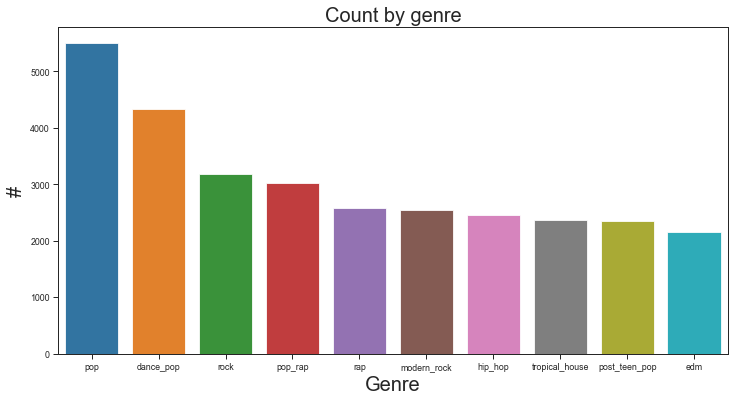

In [82]:
ycount = y.sum().sort_values(ascending=False)
_ = plt.figure(figsize=(12,6))
_ = sns.barplot(ycount.index, ycount)
_.set_title("Count by genre",fontsize=20)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("#",fontsize=20)
plt.show()

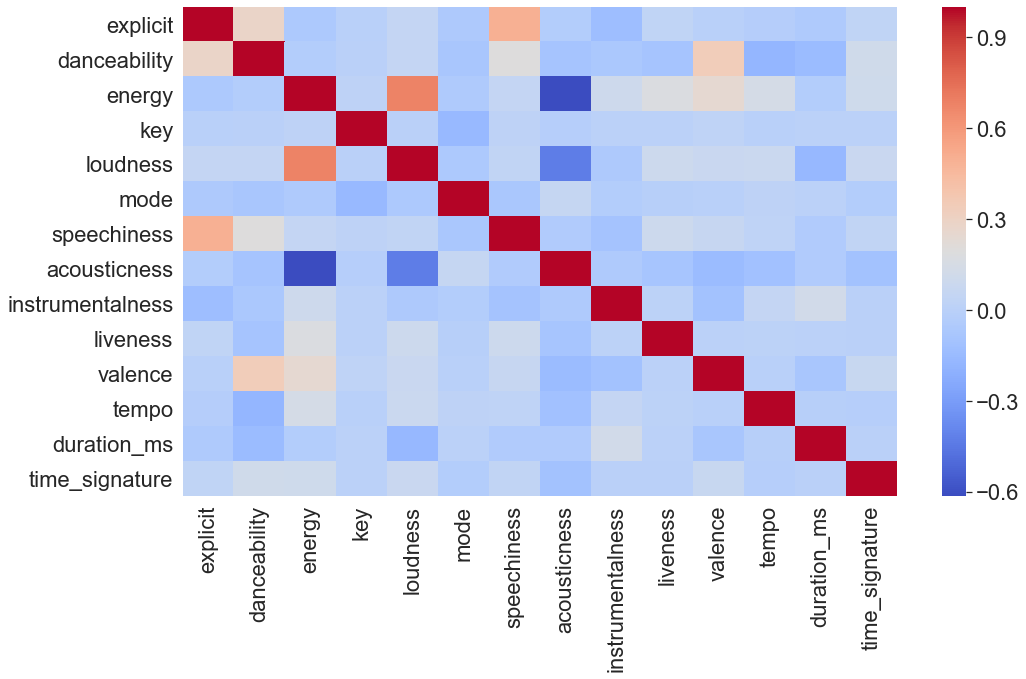

In [83]:
corr = X.corr()
sns.set(font_scale=2)
_ = plt.figure(figsize=(16,9))
_ = sns.heatmap(corr,cmap='coolwarm')

In [84]:
print (ycount)
print ('-----------------------')
print (ycount.sum())

pop               5505
dance_pop         4331
rock              3175
pop_rap           3030
rap               2572
modern_rock       2538
hip_hop           2456
tropical_house    2361
post_teen_pop     2356
edm               2155
dtype: int64
-----------------------
30479


In [85]:
rowsum = y.iloc[:,:].sum(axis=1)
rowsum = rowsum.value_counts()
rowsum

1    8211
2    3617
3    2930
4    1176
5     308
dtype: int64

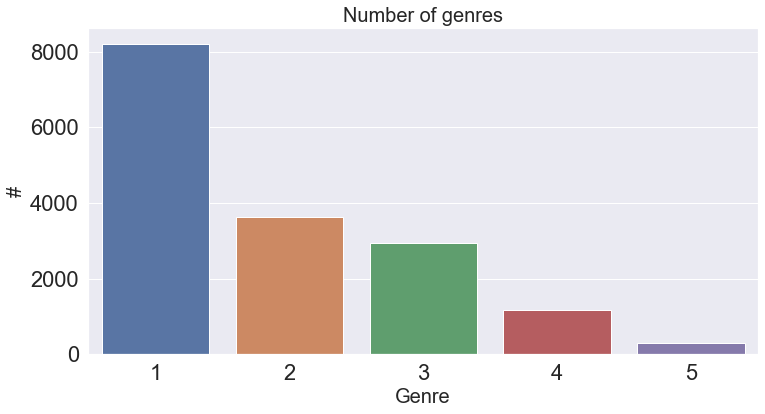

In [86]:
ycount = y.sum().sort_values(ascending=False)
_ = plt.figure(figsize=(12,6))
_ = sns.barplot(rowsum.index, rowsum)
_.set_title("Number of genres",fontsize=20)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("#",fontsize=20)
plt.show()

# ---------------------------------RANDOM FOREST----------------------------------------------

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [88]:
print (len(X_train))
print (len(X_test))
print (len(y_train))
print (len(y_test))

12181
4061
12181
4061


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [90]:
forest = RandomForestClassifier(n_estimators=100)

In [91]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
pred = forest.predict(X_test)

In [93]:
print (accuracy_score(y_test, pred))

0.19724205860625463


In [94]:
def gen_forest(estimators):
    forest = RandomForestClassifier(n_estimators=estimators, )
    forest.fit(X_train, y_train)
    pred = forest.predict(X_test)
    print (estimators)
    print (accuracy_score(y_test, pred))

In [95]:
len(X.columns)

14

In [96]:
gen_forest(10)
gen_forest(100)
gen_forest(1000)

10
0.16030534351145037
100
0.2026594434868259
1000
0.2031519330214233


In [97]:
gen_forest(14)

14
0.17212509234178774


In [98]:
gen_forest(14)

14
0.1834523516375277


In [99]:
print (np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.19185682819531674


In [100]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }

param_grid2 = {
                 'n_estimators': [7,15,30],
                 'max_depth': [2, 5, 7, 9, 11]
             }

In [101]:
clf = RandomForestClassifier()

In [102]:
len(X.columns)

14

In [103]:
grid_clf = GridSearchCV(clf, param_grid2, cv=6)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [104]:
grid_clf.best_params_

{'max_depth': 11, 'n_estimators': 15}

In [105]:
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)

In [106]:
values

[('speechiness', 0.11868686828420032),
 ('danceability', 0.10024624463041044),
 ('duration_ms', 0.08669111924107353),
 ('loudness', 0.08571678906198157),
 ('valence', 0.08461204117725432),
 ('tempo', 0.08262411427619716),
 ('energy', 0.08036860369768067),
 ('acousticness', 0.07833027896245737),
 ('explicit', 0.07672272820720245),
 ('instrumentalness', 0.07503842922516754),
 ('liveness', 0.06608496084917972),
 ('key', 0.045882780330833775),
 ('mode', 0.014095577819441372),
 ('time_signature', 0.004899464236919639)]

In [107]:
print (X.columns)
print (forest.feature_importances_)

Index(['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
[0.07672273 0.10024624 0.0803686  0.04588278 0.08571679 0.01409558
 0.11868687 0.07833028 0.07503843 0.06608496 0.08461204 0.08262411
 0.08669112 0.00489946]


In [108]:
random_pred = y_test.copy()
print (y_test.head())
random_pred.iloc[:,:] = 0
random_pred['pop'] = 1
print (accuracy_score(y_test, random_pred))

       pop  dance_pop  pop_rap  rock  tropical_house  hip_hop  modern_rock  \
22584    0          0        0     0               1        0            0   
32899    1          1        0     0               0        0            0   
2475     0          0        0     1               0        0            1   
19607    0          0        0     0               1        0            0   
5368     1          1        0     0               0        0            0   

       post_teen_pop  edm  rap  
22584              0    1    0  
32899              1    0    0  
2475               0    0    0  
19607              0    1    0  
5368               1    0    0  
0.07017975868012805


# -----------------------------------------------------------------------------------------------------------

In [109]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [110]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
balanced = ['balanced_subsample']

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#              'max_depth': max_depth,
#             'min_samples_split': min_samples_split,
#            'min_samples_leaf': min_samples_leaf,
#           'bootstrap': bootstrap}

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap,
                'class_weight': balanced}

In [111]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\abels\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [112]:
rf_random.best_params_

{'n_estimators': 10,
 'max_features': 'auto',
 'max_depth': 20,
 'class_weight': 'balanced_subsample',
 'bootstrap': False}

In [113]:
rf_pred = rf_random.predict(X_test)

In [114]:
print (len(rf_pred))

4061


In [115]:
accuracy_score(y_test, rf_pred)

0.16670770746121644

In [116]:
print (np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

0.19522132464764924


# --------------------------------------------------------------------------------------------------------------

In [117]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [118]:
classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

In [119]:
accuracy_score(y_test,predictions)

0.04752524008864811

In [120]:
energyfit = LinearRegression()

In [121]:
X["energy"].head()

0    0.595
1    0.538
2    0.578
3    0.789
4    0.459
Name: energy, dtype: float64

In [122]:
X["acousticness"].head()

0    0.28400
1    0.30600
2    0.08760
3    0.00487
4    0.07220
Name: acousticness, dtype: float64

In [123]:
energy_train = np.array(X_train['energy']).reshape(-1,1)
acousticness_train = np.array(X_train['acousticness']).reshape(-1,1)
energy_test = np.array(X_test['energy']).reshape(-1,1)
acousticness_test = np.array(X_test['acousticness']).reshape(-1,1)

In [124]:
print (energy_train)

[[0.815]
 [0.679]
 [0.688]
 ...
 [0.752]
 [0.883]
 [0.597]]


In [125]:
model = LinearRegression().fit(energy_train, acousticness_train)

In [126]:
r_sq = model.score(energy_test, acousticness_test)

In [127]:
r_sq

0.3874592417668754

In [128]:
energyfit.score(energy, acousticness)

NameError: name 'energy' is not defined